# Introductory applied machine learning
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 22/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **sticking to the submission structure** (see below). This is especially true for the submission of your predictions and your textual answer.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [61]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC, SVC
from utils import plotter
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:

# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [64]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:

#get data

data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Train.csv')
train_data = pd.read_csv(data_path,delimiter=',')

X_train = train_data.iloc[:,1:501]

y_train = train_data['is_person']


data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Validate.csv')
train_data = pd.read_csv(data_path,delimiter=',')

X_valid = train_data.iloc[:,1:501]

y_valid = train_data['is_person']


data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Test.csv')
test_data = pd.read_csv(data_path,delimiter=',')

X_test = test_data.iloc[:,0:500]


In [68]:
print(X_train.describe())
print(X_train.head(5))


              dim1         dim2         dim3         dim4         dim5  \
count  2113.000000  2113.000000  2113.000000  2113.000000  2113.000000   
mean      0.043353     0.050830     0.047988     0.037411     0.043365   
std       0.513260     0.582839     0.482166     0.464611     0.491187   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000868     0.000000     0.001359     0.000781     0.001116   
50%       0.001616     0.000340     0.003516     0.001698     0.002038   
75%       0.002404     0.001008     0.006454     0.002717     0.003125   
max       9.984000     9.122238     7.676800     9.695738     8.762671   

              dim6         dim7         dim8         dim9        dim10  \
count  2113.000000  2113.000000  2113.000000  2113.000000  2113.000000   
mean      0.049670     0.051071     0.043601     0.052698     0.054139   
std       0.558422     0.577599     0.472706     0.571629     0.588484   
min       0.000000     0.000000     0

In [69]:
print(X_valid.describe())
print(X_valid.head(5))

              dim1         dim2         dim3         dim4         dim5  \
count  1113.000000  1113.000000  1113.000000  1113.000000  1113.000000   
mean      0.001744     0.000702     0.004720     0.001978     0.002321   
std       0.001209     0.001364     0.003876     0.001417     0.001558   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000744     0.000000     0.001698     0.001019     0.001172   
50%       0.001563     0.000340     0.003736     0.001698     0.002038   
75%       0.002378     0.000758     0.007102     0.002734     0.003057   
max       0.007133     0.022135     0.023438     0.008929     0.010417   

              dim6         dim7         dim8         dim9        dim10  \
count  1113.000000  1113.000000  1113.000000  1113.000000  1113.000000   
mean      0.002110     0.001037     0.002529     0.002006     0.002641   
std       0.001559     0.000885     0.002736     0.001919     0.002293   
min       0.000000     0.000000     0

In [70]:
print(X_test.describe())
print(X_test.head(5))

              dim1         dim2         dim3         dim4         dim5  \
count  1114.000000  1114.000000  1114.000000  1114.000000  1114.000000   
mean      0.001754     0.000717     0.004379     0.001839     0.002207   
std       0.001226     0.001522     0.003648     0.001320     0.001539   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000977     0.000000     0.001488     0.000744     0.001019   
50%       0.001590     0.000340     0.003397     0.001698     0.001860   
75%       0.002378     0.000781     0.006454     0.002717     0.003057   
max       0.009046     0.027699     0.021399     0.007473     0.009766   

              dim6         dim7         dim8         dim9        dim10  \
count  1114.000000  1114.000000  1114.000000  1114.000000  1114.000000   
mean      0.002105     0.001058     0.002535     0.002053     0.002746   
std       0.001612     0.000863     0.002867     0.001990     0.002470   
min       0.000000     0.000000     0

In [30]:
standardScaler = StandardScaler().fit(X_train)
X_train_transform = standardScaler.transform(X_train)
X_valid_transform = standardScaler.transform(X_valid)


In [38]:
#LogisticRegression

number = 20

loss = {}

Csteps = np.logspace(start=-5, stop=5, num=1000)

for C in Csteps:
    lr = LogisticRegression(solver="lbfgs", C=C)
    lr.fit(X=X_train_transform, y=y_train)
    probability = lr.predict_proba(X=X_valid_transform)
    logloss = log_loss(y_true=y_valid, y_pred=probability)
    loss[C] = logloss


#sort the loss,after sorted, loss become a list
#so, need to change to dictionary again
loss = sorted(loss.items(), key=lambda x: x[1])

loss = dict((key, value) for key, value in loss)

bestC = list(loss.keys())[0]
bestLRLoss = list(loss.values())[0]

print('best C:{} best loss:{}'.format(bestC,bestLRLoss)) 



best C:99.310918137498 best loss:0.5881579404844504


In [40]:
#NaiveBayes

bestNBLoss = 1.0
bestAlpha = 0

alphas = np.linspace(start=0.1, stop=2.0, num=15)

for alpha in alphas:
    nb = MultinomialNB(alpha = alpha)
    nb.fit(X=X_train,y=y_train)
    probability = nb.predict_proba(X=X_valid)
    logloss = log_loss(y_true=y_valid, y_pred=probability)
    print('alpha:{} logloss:{}'.format(alpha, logloss))
    if logloss < bestNBLoss:
        bestNBLoss = logloss
        bestAlpha = alpha

print('best alpha:{} best loss:{}'.format(bestAlpha, bestNBLoss))

alpha:0.1 logloss:0.6922893759640738
alpha:0.2357142857142857 logloss:0.6922869494357095
alpha:0.37142857142857144 logloss:0.6922845817154107
alpha:0.5071428571428571 logloss:0.6922822715717863
alpha:0.6428571428571428 logloss:0.6922800178040652
alpha:0.7785714285714285 logloss:0.6922778192411735
alpha:0.9142857142857143 logloss:0.6922756747408428
alpha:1.05 logloss:0.6922735831887527
alpha:1.1857142857142857 logloss:0.6922715434977027
alpha:1.3214285714285714 logloss:0.6922695546068142
alpha:1.457142857142857 logloss:0.69226761548076
alpha:1.5928571428571427 logloss:0.6922657251090212
alpha:1.7285714285714286 logloss:0.6922638825051695
alpha:1.8642857142857143 logloss:0.6922620867061746
alpha:2.0 logloss:0.6922603367717356
best alpha:2.0 best loss:0.6922603367717356


In [41]:
#KNN
bestKNLoss = 1.0
bestNeighbors = 0

neighbors = np.linspace(start=5, stop=100, num=15, dtype=np.int64)

for neighbor in neighbors:
    kn = KNeighborsClassifier(n_neighbors=neighbor)
    kn.fit(X=X_train_transform,y=y_train)
    probability = kn.predict_proba(X=X_valid_transform)
    logloss = log_loss(y_true=y_valid, y_pred=probability)
    print('neighbors:{} logloss:{}'.format(neighbor, logloss))
    if logloss < bestKNLoss:
        bestKNLoss = logloss
        bestNeighbors = neighbor

print('best number of neighbors:{} best loss:{}'.format(bestNeighbors,bestKNLoss))

neighbors:5 logloss:1.5483553668538974
neighbors:11 logloss:0.7969921212182769
neighbors:18 logloss:0.6489583605518034
neighbors:25 logloss:0.6192589240520427
neighbors:32 logloss:0.6252672512467562
neighbors:38 logloss:0.6237245550291525
neighbors:45 logloss:0.6247449199746878
neighbors:52 logloss:0.6236643649921241
neighbors:59 logloss:0.6225093313062237
neighbors:66 logloss:0.6231256662399913
neighbors:72 logloss:0.6228139239787884
neighbors:79 logloss:0.6244050663351899
neighbors:86 logloss:0.6263155210979693
neighbors:93 logloss:0.6268414390413735
neighbors:100 logloss:0.6268159716767443
best number of neighbors:25 best loss:0.6192589240520427


In [46]:
stepArray = np.linspace(start=20,stop=180,num=7)

gammas = [0.1,0.2, 0.4, 0.6, 0.8, 1.6, 3.2, 6.4, 12.8]

bestSVMLoss = 1.0
bestC = 0.0
bestGamma = 0.0



for C in stepArray:
    for gamma in gammas:
        svc_rbf = SVC(kernel="rbf", gamma=gamma, C=C, probability=True)
        svc_rbf.fit(X=X_train,y = y_train)
        probability = svc_rbf.predict_proba(X=X_valid)
        logloss = log_loss(y_true=y_valid, y_pred=probability)
        print('C:{} gamma:{} logloss:{}'.format(C,gamma,logloss))
        if logloss < bestSVMLoss:
            bestSVMLoss = logloss
            bestC = C
            bestGamma = gamma

print('best C:{} best gamma:{} best loss:{}'.format(bestC,bestGamma,bestSVMLoss))

C:20.0 gamma:0.1 logloss:0.6145348915045231
C:20.0 gamma:0.2 logloss:0.6167009477929258
C:20.0 gamma:0.4 logloss:0.6057657086563196
C:20.0 gamma:0.6 logloss:0.6011071980171061
C:20.0 gamma:0.8 logloss:0.5971086378415191
C:20.0 gamma:1.6 logloss:0.590599346882183
C:20.0 gamma:3.2 logloss:0.5862804361542209
C:20.0 gamma:6.4 logloss:0.5846889129684836
C:20.0 gamma:12.8 logloss:0.5831489846235793
C:46.66666666666667 gamma:0.1 logloss:0.6164023954453676
C:46.66666666666667 gamma:0.2 logloss:0.6045695856074448
C:46.66666666666667 gamma:0.4 logloss:0.5955529792703387
C:46.66666666666667 gamma:0.6 logloss:0.5919136108988936
C:46.66666666666667 gamma:0.8 logloss:0.5897387624708553
C:46.66666666666667 gamma:1.6 logloss:0.5870842114049318
C:46.66666666666667 gamma:3.2 logloss:0.5857355382338938
C:46.66666666666667 gamma:6.4 logloss:0.5845140191842955
C:46.66666666666667 gamma:12.8 logloss:0.5852175063262985
C:73.33333333333334 gamma:0.1 logloss:0.6070407066717892
C:73.33333333333334 gamma:0.2 log

In [47]:
#RandomForest

loss = {}                                                                                      
                                                                                               
estimatorStep = np.linspace(start=100,stop=1000,num=20,dtype=np.int64)                         
                                                                                               
for estimators in estimatorStep:                                                               
    print('estimators: ',estimators)                                                           
    rf = RandomForestClassifier(n_estimators=estimators, random_state=42, oob_score=True)      
    rf.fit(X=X_train_transform, y=y_train)                                                               
    probability = rf.predict_proba(X=X_valid_transform)                                                  
    logloss = log_loss(y_true=y_valid, y_pred=probability)                                     
    loss[estimators] = logloss                                                                 
                                                                                               
loss = sorted(loss.items(), key=lambda x: x[1])                                                
                                                                                               
loss = dict((key, value) for key, value in loss)                                               
                                                                                               
bestEstimator = list(loss.keys())[0]                                                           
bestRFLoss = list(loss.values())[0]                                                              
                                                                                               
print('best n_estimators:{} best loss:{}'.format(bestEstimator,bestRFLoss))                      

estimators:  100
estimators:  147
estimators:  194
estimators:  242
estimators:  289
estimators:  336
estimators:  384
estimators:  431
estimators:  478
estimators:  526
estimators:  573
estimators:  621
estimators:  668
estimators:  715
estimators:  763
estimators:  810
estimators:  857
estimators:  905
estimators:  952
estimators:  1000
best n_estimators:526 best loss:0.5829477866467017


[0.5881579404844504, 0.6922603367717356, 0.6192589240520427, 0.5831489846235793, 0.5829477866467017]


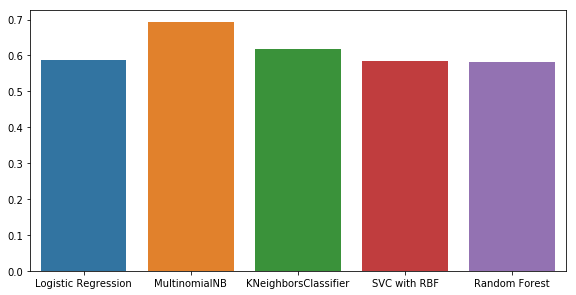

In [50]:
lossArray = [bestLRLoss,bestNBLoss,bestKNLoss,bestSVMLoss,bestRFLoss]
print(lossArray)
labels = ['Logistic Regression','MultinomialNB','KNeighborsClassifier','SVC with RBF','Random Forest']

plt.figure(figsize=(6.4 * 1.5, 4.8))
ax = sns.barplot(x=labels, y=lossArray)
plt.show()


In [6]:
rf = RandomForestClassifier(n_estimators=526, random_state=42, oob_score=True)      
rf.fit(X=X_train, y=y_train)
pred_probabilities = rf.predict_proba(X=X_test)

#ANSWER_TEXT#

***Your answer goes here:***
In order to find the best performing classifier, the following will be divided into 5 steps: load data, preprocess data, select classifier, training classifier, and finally compare classifier performance

1. load data

The first step is to load the data, the characteristics of X:dim1 to dim500, y: true labels, and observe the data through the decribe, head function. Here I observe that the feature values ​​are relatively small.

2. preprocess data

Here I consider using StandardScaler for normalization. After the data is normalized, the logloss value does not decrease significantly for logistic regression, but there is also a small decrease. Logistic regression and SVM will strongly depend on whether the feature is normalized.

3. Choosing a classifier 

I chose a typical five classifiers: Logistic Regression, MultinomialNB Classifier, SVM with RBF, KNeighborsClassifier and Random Forest. These 5 classifiers are carried by sklearn, and they are also used in reality, which is very representative.

4. training classifier

the hyperparameter of the classifier will affect the performance of the classifier, here we will choose to optimize the hyperparameters that have a greater impact on performance. First, the hyperparameters that need to be tuned are selected, and then the hyperparameters are adjusted by looping. Then use valid dataset to calculate the logloss value, finally compare the value logloss and chose the best hyperparameters. Although this method may not obtain the global optimal solution, it can guarantee local optimization.

    Super parameters that need to be tuned:
    
    Logistic regression: C (regularization parameter)

    MultinomialNB: alpha

    SVM with RBF: C, gamma

    KNeighborsClassifier:n_neighbors

    Random forest:n_estimators

5. compare classifier performance 

Compare the values of logloss in the verification data set among the 5 classifiers with best hyperparameters. Select the classifier with the smallest logloss.

In conclusion, the best logloss of these classifier as follows:

LR :0.5881579404844504

NB:0.6922603367717356

KNN: 0.6192589240520427

SVM with RBF: 0.5831489846235793

RF: 0.5829477866467017

So,the best classifier is Random Forest, and I will use it in test data.



In [7]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.75475285, 0.24524715
0.73764259, 0.26235741
0.48098859, 0.51901141
0.43155894, 0.56844106
0.49239544, 0.50760456
0.31749049, 0.68250951
0.51140684, 0.48859316
0.29847909, 0.70152091
0.86121673, 0.13878327
0.67300380, 0.32699620
0.66349810, 0.33650190
0.65209125, 0.34790875
0.54182510, 0.45817490
0.62547529, 0.37452471
0.15779468, 0.84220532
0.63307985, 0.36692015
0.28517110, 0.71482890
0.48479087, 0.51520913
0.70912548, 0.29087452
0.43726236, 0.56273764
0.72623574, 0.27376426
0.51711027, 0.48288973
0.43726236, 0.56273764
0.59315589, 0.40684411
0.73764259, 0.26235741
0.25855513, 0.74144487
0.36882129, 0.63117871
0.69581749, 0.30418251
0.37642586, 0.62357414
0.50190114, 0.49809886
0.72433460, 0.27566540
0.50000000, 0.50000000
0.84980989, 0.15019011
0.52851711, 0.47148289
0.58174905, 0.41825095
0.45627376, 0.54372624
0.27946768, 0.72053232
0.60456274, 0.39543726
0.75855513, 0.24144487
0.60266160, 0.39733840
0.77566540, 0.22433460
0.53041825, 0.46958175
0.56653992, 0.43346008
0.83650190,